In [1]:
import numpy as np
from loss import MSELoss, BinaryCrossEntropyLoss
from module import Linear, TanH, Sigmoid, Sequentiel
from optimizer import Optim, SGD
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
x = np.random.randn(1000, 3)
y = np.hstack((np.expand_dims(x[:, 0] + 2 * x[:, 1], 1), np.expand_dims(x[:, 0] + x[:, 1] + 5 * x[:, 2], 1)))

module = Linear(3, 2)
loss = MSELoss()

train_loss = []

for _ in range(100):
    yhat = module.forward(x)
    train_loss.append(np.sum(loss.forward(y, yhat)))

    delta1 = loss.backward(y, yhat)
    delta1 = delta1 / delta1.shape[0]

    module.backward_update_gradient(delta1)
    module.update_parameters(gradient_step=.1)
    module.zero_grad()

module.forward(np.array([[1, 2, 3]]))

array([[ 4.99999999, 17.99999995]])

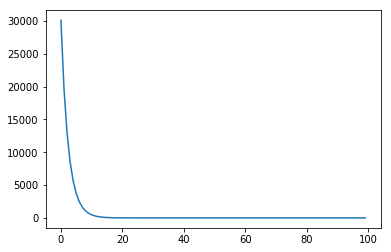

In [3]:
plt.plot(range(100), train_loss)

In [4]:
m = Sequentiel(Linear(3, 2))
op = Optim(m, MSELoss(), lr=.1)

train_loss = []

for _ in range(100):
    yhat = m.forward(x)
    train_loss.append(np.sum(MSELoss().forward(y, yhat)))

    op.zero_grad()
    op.step(x, y)

m.forward(np.array([[1, 2, 3]]))

array([[ 4.99999999, 17.99999994]])

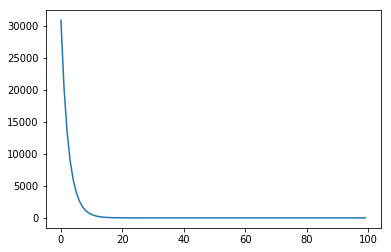

In [5]:
plt.plot(range(100), train_loss)

In [6]:
x, y = gen_arti(nbex=10000, data_type=2)
y[y == -1] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [7]:
m = Sequentiel(Linear(2, 20), TanH(), Linear(20, 40), TanH(), Linear(40, 80), TanH(), Linear(80, 100))
op = Optim(m, BinaryCrossEntropyLoss(), lr=.1)

train_loss, test_loss = [], []

for _ in range(10000):
    yhat_train = m.forward(x_train)
    yhat_test = m.forward(x_test)
    train_loss.append(np.sum(BinaryCrossEntropyLoss().forward(y_train, yhat_train)))
    test_loss.append(np.sum(BinaryCrossEntropyLoss().forward(y_test, yhat_test)))

    op.step(x_train, y_train)
    op.zero_grad()

KeyboardInterrupt: 

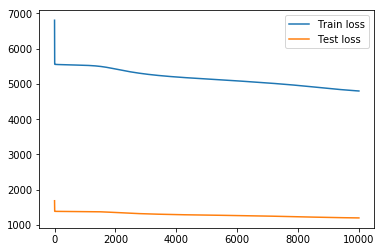

In [ ]:
plt.plot(range(10000), train_loss, label="Train loss")
plt.plot(range(10000), test_loss, label="Test loss")
plt.legend()

In [ ]:
m.add_layer(Sigmoid())

yhat = m.forward(x_test)
yhat[yhat >= .5] = 1
yhat[yhat < .5] = 0

In [ ]:
accuracy_score(y_test, yhat)

0.534

In [ ]:
m = Sequentiel(Linear(2, 10), TanH(), Linear(10, 1))

sgd = SGD(m, BinaryCrossEntropyLoss(), x_train, y_train, epoch=int(1e4), lr=.1)
sgd.run()

KeyboardInterrupt: 

In [ ]:
m.add_layer(Sigmoid())

yhat = m.forward(x_test)
yhat[yhat >= .5] = 1
yhat[yhat < .5] = 0

accuracy_score(y_test, yhat)


0.51435

In [2]:
uspsdatatrain = "../data/USPS_train.txt"
alltrainx, alltrainy = load_usps(uspsdatatrain)
uspsdatatest = "../data/USPS_test.txt"
alltestx, alltesty = load_usps(uspsdatatest)

In [4]:
one_hot(alltesty)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])